First we upload the two dataset of the sign mnist


In [1]:
import pandas as pd
from scipy.stats import skew


# Load the dataset
df = pd.read_csv('sign_mnist_train.csv')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Count the number of images per class
class_counts = df['label'].value_counts().sort_index()


# Compute the skew

skew2 = 3*(class_counts.mean() - class_counts.median()) / class_counts.std()
skew = class_counts.std() / class_counts.mean()
print(f"Number of classes: {len(class_counts)}")
print(f"Class distribution:\n{class_counts}")
print(f"Skew:{skew2} and {skew}")
df.skew()

# 3 * (mean–median) / standard deviation = skew

Number of classes: 24
Class distribution:
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64
Skew:-0.43129847690785494 and 0.0732183141355446


label      -0.095249
pixel1     -0.558068
pixel2     -0.577706
pixel3     -0.645864
pixel4     -0.772380
              ...   
pixel780   -0.916529
pixel781   -0.954015
pixel782   -0.947602
pixel783   -0.952318
pixel784   -0.930335
Length: 785, dtype: float64

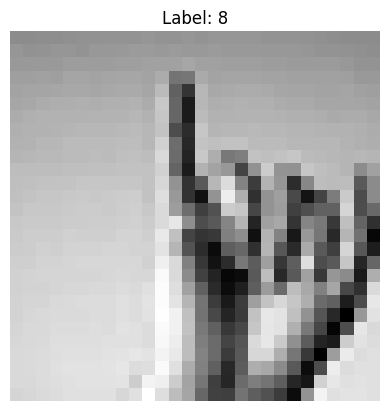

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(dataset, index):
    image = dataset.iloc[index, 1:].values.reshape(28, 28)
    label = dataset.iloc[index, 0]

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Usage example:
show_image(df, 6)

The best ML model to classify these image should be the random forest deicsion tree or the KNN

K Nearest Neighbors (KNN): KNN is a simple and intuitive classification algorithm that assigns labels to data points based on the labels of their nearest neighbors in the feature space. KNN can be a reasonable choice for this task, as it can capture local patterns in the image data. However, KNN might not scale well to large datasets and can be sensitive to irrelevant features. Given the size of the Sign Language MNIST dataset, KNN can be a viable option to consider.